In [233]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mxnet as mx
from mxnet import gluon, nd
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score

data = pd.read_csv('owid-covid-data.csv')
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.291600e+04,42722.000000,41940.000000,42916.000000,42722.000000,41940.000000,42658.000000,42658.000000,41875.000000,42658.000000,42658.000000,41875.000000,1.483200e+04,1.520900e+04,15209.000000,14832.000000,1.667000e+04,16670.000000,15474.000000,15854.000000,35940.000000,4.323600e+04,41283.000000,38811.000000,38237.000000,38610.000000,38319.000000,25590.000000,38826.000000,40183.00000,30508.000000,30125.000000,18106.000000,35124.000000,42696.000000,37459.000000
mean,8.815869e+04,1348.381396,1332.290460,3737.360751,43.112729,43.133713,1688.977129,22.819091,22.463506,53.535647,0.558673,0.558898,2.139566e+04,1.300887e+06,46.195596,0.656680,2.059323e+04,0.633107,181.456683,0.064583,57.815503,8.961048e+07,362.531714,31.385007,9.297233,5.883121,21027.877288,11.977491,251.162317,8.04622,10.846865,32.638033,52.644169,3.118075,74.069988,0.726024
std,9.132395e+05,12319.517635,12078.737003,34911.354322,365.860098,355.536177,3662.956938,70.889186,54.342312,138.499758,3.074576,1.947511,8.651013e+04,5.714103e+06,83.815914,1.108684,7.935455e+04,1.002160,939.889462,0.090959,27.863758,6.175935e+08,1665.763429,9.023214,6.330074,4.324543,20493.362846,19.119975,117.686039,4.14035,10.483841,13.403570,31.566573,2.533455,7.361798,0.152639
min,0.000000e+00,-8261.000000,-552.000000,0.000000,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,0.000000,-67.901000,-9.678000,-3.743000e+03,1.000000e+00,0.000000,-0.398000,0.000000e+00,0.000000,1.535000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.99000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,4.700000e+01,0.000000,0.429000,0.000000,0.000000,0.000000,21.862250,0.000000,0.113000,0.000000,0.000000,0.000000,9.377500e+02,4.207300e+04,2.454000,0.059000,1.044000e+03,0.061000,11.890250,0.008000,38.890000,1.402985e+06,39.497000,23.500000,3.556000,2.142000,5591.597000,0.500000,153.507000,5.31000,1.900000,21.400000,21.222000,1.300000,69.910000,0.606000
50%,8.800000e+02,9.000000,13.429000,15.000000,0.000000,0.143000,258.319000,1.402000,2.724000,4.316000,0.000000,0.017000,3.129500e+03,1.738190e+05,13.069000,0.272000,3.529500e+03,0.295000,33.779000,0.028000,64.350000,8.654618e+06,88.125000,31.400000,6.991000,4.419000,14103.452000,1.800000,237.372000,7.11000,6.400000,31.400000,55.182000,2.500000,75.490000,0.755000
75%,9.273250e+03,150.000000,154.857000,199.000000,3.000000,2.857000,1682.260500,15.760000,17.305000,32.262500,0.192750,0.267000,1.160825e+04,6.695890e+05,53.869000,0.796000,1.221325e+04,0.792000,109.839500,0.081000,80.090000,3.107294e+07,214.243000,39.700000,14.799000,9.473000,32415.132000,16.000000,318.949000,10.18000,19.600000,40.900000,83.741000,4.200000,79.930000,0.853000
max,2.880278e+07,309269.000000,270606.714000,920931.000000,10491.000000,7456.571000,42179.962000,4944.376000,882.924000,1237.551000,215.382000,63.140000,1.229029e+06,9.473327e+07,795.955000,16.574000,1.066782e+06,12.502000,47299.000000,0.651000,100.000000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.36000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [234]:
# 看数据信息
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43494 entries, 0 to 43493
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         43236 non-null  object 
 1   continent                        42978 non-null  object 
 2   location                         43494 non-null  object 
 3   date                             43494 non-null  object 
 4   total_cases                      42916 non-null  float64
 5   new_cases                        42722 non-null  float64
 6   new_cases_smoothed               41940 non-null  float64
 7   total_deaths                     42916 non-null  float64
 8   new_deaths                       42722 non-null  float64
 9   new_deaths_smoothed              41940 non-null  float64
 10  total_cases_per_million          42658 non-null  float64
 11  new_cases_per_million            42658 non-null  float64
 12  new_cases_smoothed

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


<AxesSubplot:>

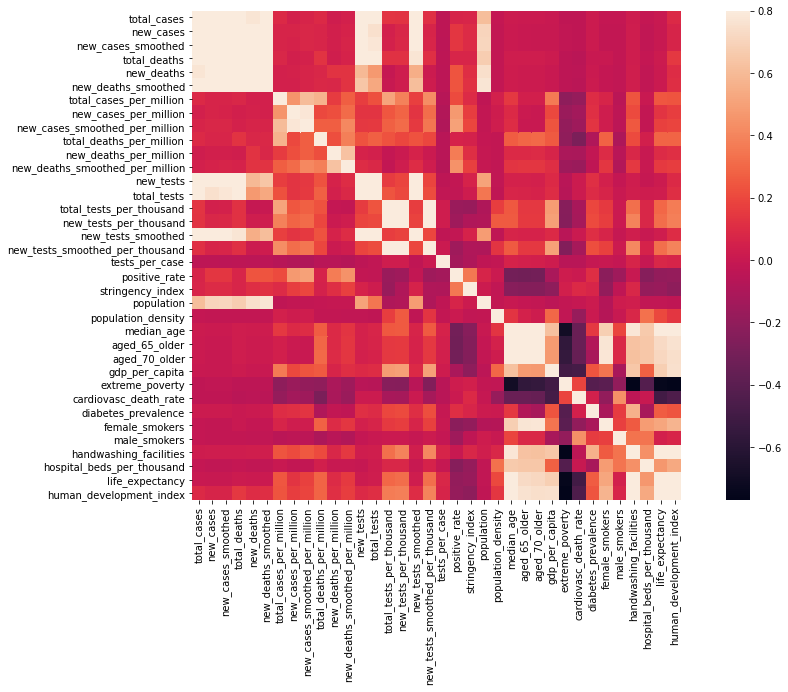

In [6]:
# 热力图，看各个变量之间相关系数，发现
# new_cases, total_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed,
# total_tests, new_tests, new_tests_smoothed 相关性几乎为1，可以相互表示.
# 因为测试的人多，发现感染的就多，发现的多，死亡就多。
# new_cases, total_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed 和 population 相关性几乎为1，因为一个国家人口基数越大，死亡越多。
corr_mat = data.corr()
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corr_mat, vmax=.8, square=True)

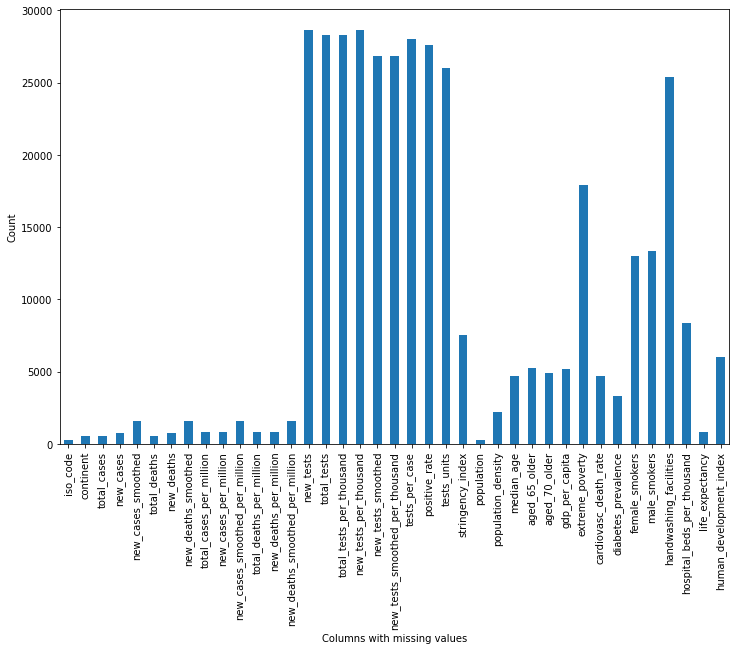

In [7]:
# 看哪些数据缺失
def plot_missing(df):
    nan_sum = df.isnull().sum()
    nan_sum = nan_sum[nan_sum > 0]
    nan_sum.plot.bar(figsize=(12, 8))
    plt.xlabel('Columns with missing values')
    plt.ylabel('Count')

plot_missing(data)

In [235]:
# 缺失率大于25% 的数据column 丢弃 
def massive_missing(df, threshod=0.6):
    nan_sum = df.isnull().sum()
    return nan_sum[nan_sum > df.shape[0] * threshod]

missing_series = massive_missing(data, 0.25)
print(missing_series.index)

Index(['new_tests', 'total_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate',
       'tests_units', 'extreme_poverty', 'female_smokers', 'male_smokers',
       'handwashing_facilities'],
      dtype='object')


new_deaths Skewness: 14.775234
new_deaths Kurtosis: 250.183941
new_cases_per_million Skewness: 13.829375
new_cases_per_million Kurtosis: 657.768070
new_cases Skewness: 16.910962
new_cases Kurtosis: 328.713065


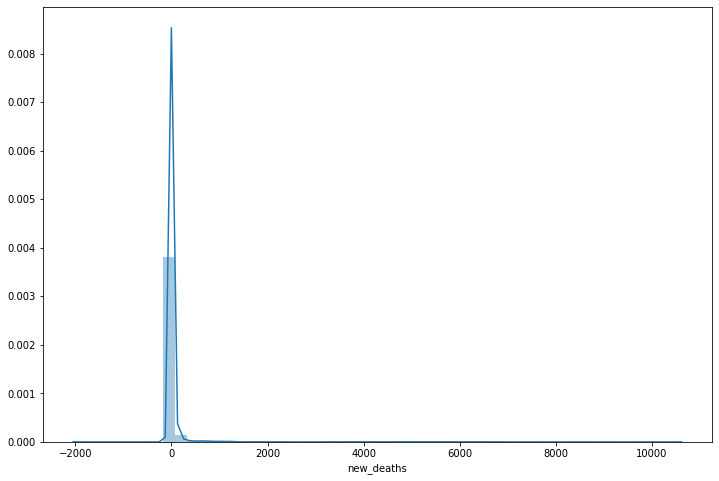

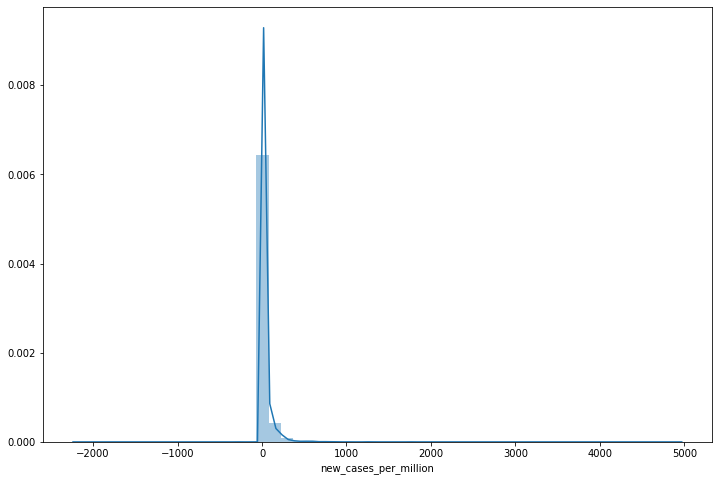

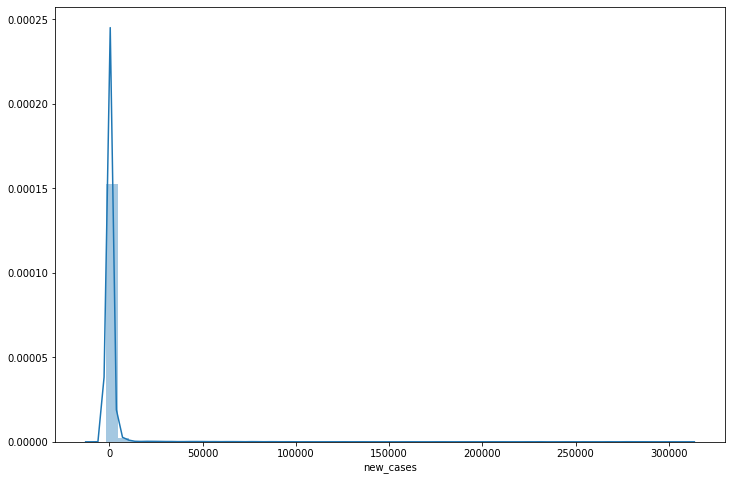

In [5]:
# 查看各个数据的峰度和偏度，发现他们都尖锐，实际分布不好，也说明死亡一来，就很多。
def plot_y(y):
    f, ax = plt.subplots(figsize=(12, 8))
    sns.distplot(data[y])
    print("%s Skewness: %f" % (y, data[y].skew()))
    print("%s Kurtosis: %f" % (y, data[y].kurt()))
plot_y('new_deaths')
plot_y('new_cases_per_million')
plot_y('new_cases')

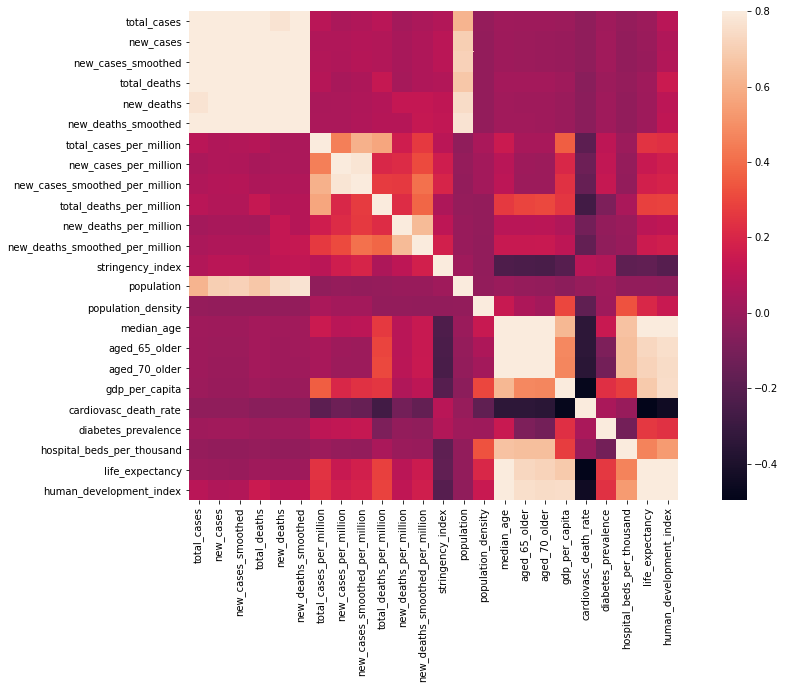

In [236]:
# 去掉缺失值多的列后，画热力图，看着清爽
df = data.drop(missing_series.index, axis=1)
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(df.corr(), vmax=.8, square=True)

In [237]:
# 删除国家代码和日期
df.drop(['iso_code', 'continent'], axis=1, inplace=True)

In [238]:
# 准备做kmeans
cols = df.columns.to_list()
cols.remove('location')
cols.remove('date')

In [239]:
# convert all data to int, then dropna, find best k in kmeans
df_kmeans0 = df[cols].applymap(lambda x: int(x) if (type(x) != 'object' and not pd.isna(x)) else x)
df_kmeans0.dropna(inplace=True)

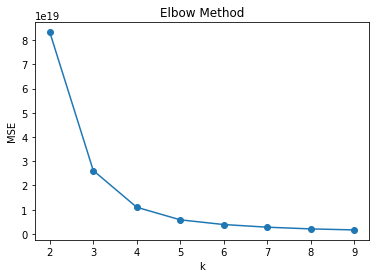

In [240]:
# Elbow 函数，拐点是kmeans 的 k
def find_best_k(X):
    ks = range(2, 10) # find inflection point
    mse = []
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        mse.append(kmeans.inertia_)

    plt.plot(ks, mse, 'o-')
    plt.xlabel('k')
    plt.ylabel('MSE')
    plt.title('Elbow Method')
    plt.show()
find_best_k(df_kmeans0)

In [241]:
# 数据归一化
df_kmeans = df[cols].apply(lambda x: (x - x.mean()) / (x.std()))
df_kmeans.dropna(inplace=True)

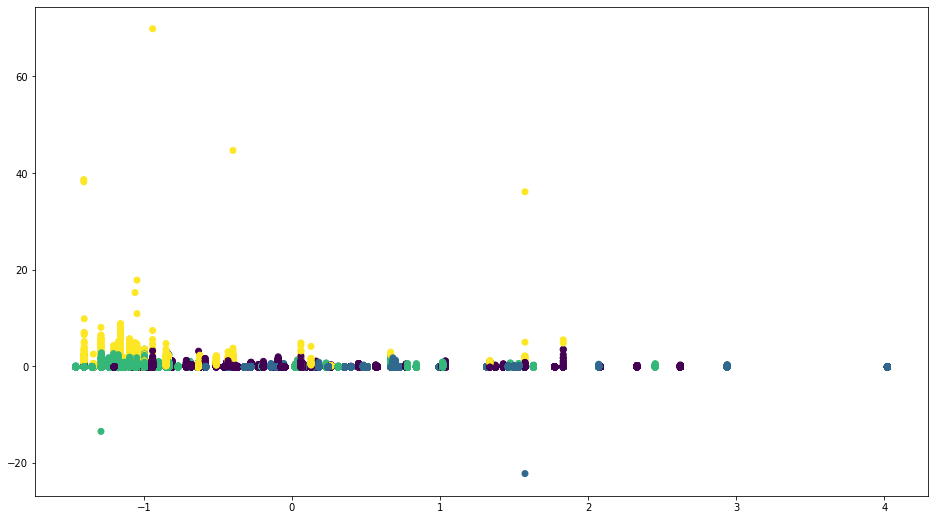

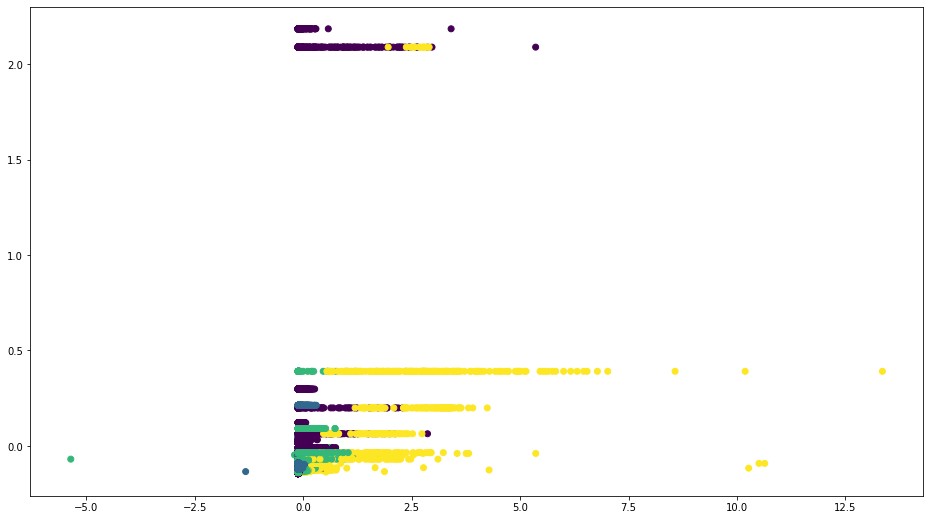

In [242]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_kmeans)

# 找了 心脑血管和新死亡率的关系，新死亡率和人口的关系，kmeans的聚类不能很好反应他们之间是否有关系
# 这和热力图反应结果相似，死亡数，死亡率，并没有和某个或某几个强相关。
f, ax = plt.subplots(figsize=(16, 9))
plt.scatter(df_kmeans['cardiovasc_death_rate'], df_kmeans['new_deaths_per_million'], c=kmeans.labels_)
f, ax = plt.subplots(figsize=(16, 9))
plt.scatter(df_kmeans['new_deaths'], df_kmeans['population'], c=kmeans.labels_)

In [243]:
# 根据4分类，做每个分类平均，看能发现什么
df_kmeans0['label'] = kmeans.labels_
classed = df_kmeans0.groupby('label').agg(lambda x: np.mean(x))

# 发现国内生产总值（gdp_per_capita） 越高，新发病和死亡的人数越高。其他医院建设，糖尿病发病率，老龄化比例等都跟新发病，新死亡无关。
# 聚类结果发现热力图没有的结论。
# 对数据分两类，0，1，2一类，是 gdp_per_capita 低的国家，3 是高的国家， new_deaths 也高。
# GDP高，越发达，流动性越高，所以死亡人数多。
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth',100)
classed

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
label,,,,,,,,,,,,,,,,,,,,,,,,
0,31450.648247,656.398949,625.293958,951.674971,18.080804,17.140502,858.042486,15.823807,15.287888,20.006341,0.190506,0.170486,65.204095,9.267055e+07,169.632847,29.867198,6.175831,3.523508,18024.734396,268.102002,9.618715,1.869191,73.845185,0.0
1,7382.765019,111.697278,108.877034,152.482009,2.166615,1.977003,286.067272,4.016740,3.875939,4.317428,0.014706,0.011733,61.314925,3.299304e+07,105.599499,20.212766,2.982478,1.484512,3007.747497,322.772997,4.720119,0.672559,64.304599,0.0
2,36037.683710,352.373231,336.803824,2557.913691,11.995141,11.704205,1560.328439,13.502218,13.136911,83.471688,0.264631,0.257342,44.635432,2.704036e+07,345.558314,41.481196,17.208325,11.237904,38047.874921,189.434608,5.935348,4.676421,79.837946,0.0
3,533756.451071,8651.938043,8479.408801,21390.059062,314.409380,306.876086,10279.158657,161.105964,157.441228,231.642154,4.383324,4.039954,77.635206,7.696594e+07,222.840764,33.404169,8.777070,5.449334,39005.659525,152.434858,9.013897,1.963521,77.438332,0.0


In [244]:
# 下面进行预测分析
numeric_feature = df[cols].dtypes[df[cols].dtypes != 'object'].index
mean_df = df[numeric_feature].mean()
std_df = df[numeric_feature].std()
df[numeric_feature] = (df[numeric_feature] - mean_df) / std_df

In [245]:
# 填充缺失值
def fill_missing_values(df):
    nan_sum = df.isnull().sum()
    nan_sum = nan_sum[nan_sum > 0]
    for column in list(nan_sum.index):
        if df[column].dtype == 'object':
            df[column].fillna(df[column].value_counts().index[0], inplace=True)
        elif df[column].dtype == 'int64' or 'float64':
            df[column].fillna(df[column].median(), inplace=True)
fill_missing_values(df)
df.isnull().sum().max()

0

In [246]:
# 把国家，字符串转换数字
countries = list(set(df['location'].to_list()))
country_code = {c: i for i, c in enumerate(countries)}
df['location'] = df['location'].apply(lambda x: country_code[x])

In [249]:
# 去除极强相关的冗余变量，否则train不出
train = df.drop(['total_cases', 'new_cases_smoothed',
                'total_deaths', 'new_deaths_smoothed',
                'total_cases_per_million', 'new_cases_smoothed_per_million',
                'total_deaths_per_million', 'new_deaths_smoothed_per_million'], axis=1)

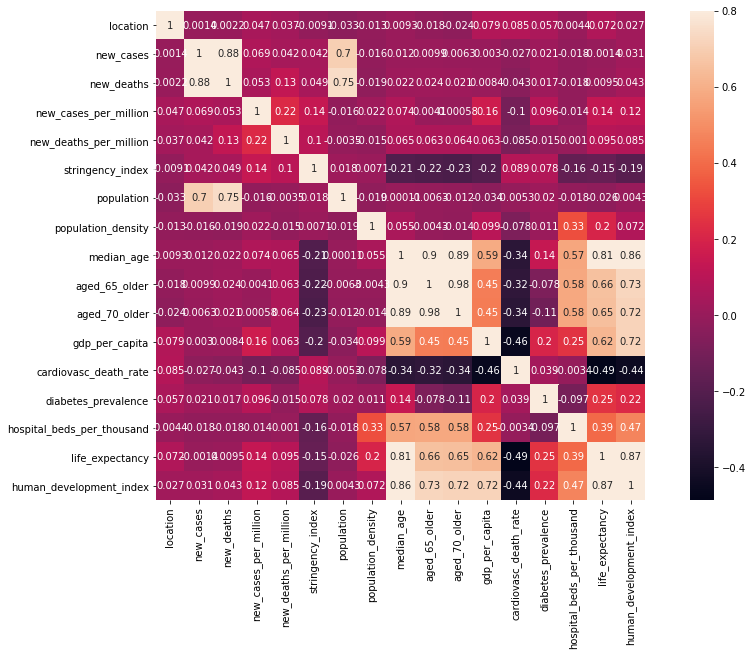

In [250]:
# 观察新热力图
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(train.corr(), vmax=.8, annot=True, square=True)

In [49]:
# 从上图可以看出
# 1. new_deaths 和 new_cases, population 强相关，而这是不言而喻的，不能作为预测新死亡率的标准
# 2. new_deaths_per_million 和 new_cases_per_million, new_deaths 弱相关，其他不相关。
# 因此想做死亡或者病例预测，是不太可能有make sense的结果。
# 下面还是用神经网络做了回归预测，y 是new_deaths_per_million， new_deaths。结果都训练不出来，RMSE是nan，经过神经网络计算出的死亡率是负值，不make sense。

In [251]:
def get_net():
    net = gluon.nn.Sequential()
    net.add(gluon.nn.Dense(100, activation='relu'),
            gluon.nn.Dense(1))
    net.initialize(mx.init.Xavier())
    return net
loss = gluon.loss.L2Loss()

def log_rmse(net, features, labels):
    # 将小于1的值设成1，使得取对数时数值更稳定
    clipped_preds = nd.clip(net(features), 1, float('inf'))
    rmse = nd.sqrt(loss(clipped_preds.log(), labels.log()).mean())
    return rmse.asscalar()


def training(net, train_features, train_labels, num_epochs, learning_rate, batch_size):
    train_ls = []
    train_iter = gluon.data.DataLoader(gluon.data.ArrayDataset(
        train_features, train_labels), batch_size, shuffle=True)
    # 这里使用了Adam优化算法
    trainer = gluon.Trainer(net.collect_params(), 'adam', {
        'learning_rate': learning_rate})
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with mx.autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(log_rmse(net, train_features, train_labels))
        print('loss: {}, train rmse: {}'.format(l.mean().asscalar(), train_ls[-1]))
    return train_ls

num_epochs, learning_rate, batch_size = 20, 0.001, 32
net = get_net()

train_cols = train.columns.to_list()
train_cols.remove('new_deaths_per_million')
train_cols.remove('date')
train_features = nd.array(train[train_cols].values)
train_labels = nd.array(train.new_deaths_per_million.values).reshape((-1, 1))

training(net, train_features, train_labels, num_epochs, learning_rate, batch_size)

loss: 0.011950894258916378, train rmse: nan
loss: 0.016245480626821518, train rmse: nan
loss: 0.016412457451224327, train rmse: nan
loss: 0.0024251574650406837, train rmse: nan
loss: 0.35663458704948425, train rmse: nan
loss: 0.02744395099580288, train rmse: nan
loss: 0.02235204540193081, train rmse: nan
loss: 0.014185664243996143, train rmse: nan
loss: 0.03335830569267273, train rmse: nan
loss: 0.029230386018753052, train rmse: nan
loss: 0.12015039473772049, train rmse: nan
loss: 0.006024396046996117, train rmse: nan
loss: 0.3667498528957367, train rmse: nan
loss: 0.046783119440078735, train rmse: nan
loss: 0.041085559874773026, train rmse: nan
loss: 0.05512915179133415, train rmse: nan
loss: 0.18061059713363647, train rmse: nan
loss: 0.01453530415892601, train rmse: nan
loss: 0.014373667538166046, train rmse: nan
loss: 0.12889091670513153, train rmse: nan


[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [255]:
# 下面进行LSTM预测
df_rnn = data.drop(missing_series.index, axis=1)
df_rnn.drop(['iso_code', 'continent'], axis=1, inplace=True)

cols = df_rnn.columns.to_list()
cols.remove('location')
cols.remove('date')

numeric_feature = df_rnn[cols].dtypes[df_rnn[cols].dtypes != 'object'].index
mean_df = df_rnn[numeric_feature].mean()
std_df = df_rnn[numeric_feature].std()
df_rnn[numeric_feature] = (df_rnn[numeric_feature] - mean_df) / std_df

fill_missing_values(df_rnn)
df_rnn['location'] = df_rnn['location'].apply(lambda x: country_code[x])
df_rnn = df_rnn.drop(['total_cases', 'new_cases_smoothed',
                'total_deaths', 'new_deaths_smoothed',
                'total_cases_per_million', 'new_cases_smoothed_per_million',
                'total_deaths_per_million', 'new_deaths_smoothed_per_million'], axis=1)

In [256]:
# 设置X， Y
y_name = 'new_deaths'
df_rnn.index = df_rnn['date']
Y = df_rnn.pop(y_name)
df_rnn.insert(len(df_rnn.columns), 'Y', Y)
df_rnn.drop(['date', 'location'], axis=1, inplace=True)

In [263]:
# 产生lstm数据
step = 10
train_ratio = 0.7

def gen_lstm_data(data, step=10):
    x, y =[], []
    for i in range(len(data) - step):
        x_temp = data[i:i+step, 1:-1].ravel().reshape(1, -1)
        y_temp = data[i+step:i+step+1, -1]
        x.append(x_temp)
        y.append(y_temp.tolist())
    return np.array(x), np.array(y)

data_x, data_y = gen_lstm_data(df_rnn.values)
print(df_rnn.shape, data_x.shape, data_y.shape) # (43494, 16) (43484, 1, 140) (43484, 1)

train_length = int(train_x.shape[0] * train_ratio)
train_x = data_x[:train_length , :]
train_y = data_y[:train_length , :]
validation_x = data_x[train_length: , :]
validation_y = data_y[train_length: , :]

print(train_x.shape, train_y.shape, validation_x.shape, validation_y.shape) # (30438, 1, 140) (30438, 1) (13046, 1, 140) (13046, 1)

(43494, 16) (43484, 1, 140) (43484, 1)
(14914, 1, 140) (14914, 1) (28570, 1, 140) (28570, 1)


In [268]:
loss = gluon.loss.L2Loss()

class LSTM(gluon.nn.Block):
    """
        input:     (21306, 1, 140)
        LSTM:      (140, 64) -> (21306, 1, 64)
        drop:                -> (21306, 1, 64)
        concat:              -> (10, 64)
        decoder:             -> (10, 1)
    """
    def __init__(self, num_hiddens, input_size):
        super(LSTM, self).__init__()
        self.encoder = gluon.rnn.LSTM(hidden_size=num_hiddens, input_size=input_size)
        self.middle = gluon.nn.Dense(1)
        self.drop = gluon.nn.Dropout(0.05)
        self.decoder = gluon.nn.Dense(1)

    def forward(self, inputs):
        outputs = self.encoder(inputs)
        outs = self.decoder(self.drop(self.middle(outputs)))
        return outs
    
def train(features, labels, num_epochs, net, trainer, loss, validation_x=None, validation_y=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, m, start = 0.0, 0.0, 0, 0, time.time()

        with mx.autograd.record():
            y_hat = net(features)
            l = loss(y_hat, labels)

        l.backward()
        trainer.step(labels.shape[0])

        train_l_sum += l.sum().asscalar()
        n += l.size
        if epoch & 31 == 0:
            if validation_x is not None:
                validation_loss = loss(net(validation_x), validation_y).mean().asscalar()
                msg = 'epoch %d, train_loss %.4f, validation_loss %.4f, time %.4fs' % (
                epoch + 1, train_l_sum / n, validation_loss, time.time() - start)
            else:
                msg = 'epoch %d, train_loss %.4f, time %.4fs' % (epoch + 1, train_l_sum / n, time.time() - start)
            print(msg)
        
def run_mxnet(train_x, train_y, net, trainer, num_epochs, learning_rate, validation_x=None, validation_y=None):
    if validation_x is not None:
        train(nd.array(train_x), nd.array(train_y), num_epochs, net, trainer, loss, nd.array(validation_x),
              nd.array(validation_y))
    else:
        train(nd.array(train_x), nd.array(train_y), num_epochs, net, trainer, loss)

In [271]:
num_epochs = 200
learning_rate = 1e-4

net = LSTM(64, train_x.shape[2])
net.initialize(mx.init.Xavier())
trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': learning_rate})
run_mxnet(train_x, train_y, net, trainer, num_epochs, learning_rate, validation_x, validation_y)

epoch 1, train_loss 0.0654, validation_loss 0.6851, time 0.6015s
epoch 33, train_loss 0.0345, validation_loss 0.6435, time 0.4859s
epoch 65, train_loss 0.0280, validation_loss 0.6371, time 0.5013s
epoch 97, train_loss 0.0236, validation_loss 0.6307, time 0.5306s
epoch 129, train_loss 0.0188, validation_loss 0.6289, time 0.6575s
epoch 161, train_loss 0.0168, validation_loss 0.6159, time 0.5086s
epoch 193, train_loss 0.0127, validation_loss 0.6106, time 0.5965s


In [273]:
# 预测部分
def evaluate_mxnet(net, X, Y):
    start = time.time()
    loaded = time.time()
    print(f'mxnet load weights cost: {loaded - start}s')

    Y_hat = net(nd.array(X)).asnumpy()
    print(f'mxnet predict one average cost: {(time.time() - loaded) / Y_hat.size}s')
    print(f'mxnet r2 score: {r2_score(Y_hat, Y)}')
    print('mxnet percentage error: {:.4f}%'.format(((Y_hat - Y) / Y).mean() * 100))

evaluate_mxnet(net, validation_x, validation_y)

mxnet load weights cost: 0.0s
mxnet predict one average cost: 9.89810962296467e-06s
mxnet r2 score: -27.167602664420194
mxnet percentage error: -41.6163%


(10, 1) (248, 1)


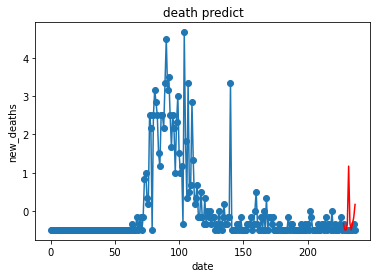

In [274]:
# 预测最后10天
print(p10.shape, predict_y.shape)
length = len(predict_y[:-10])
plt.plot(range(length), predict_y[:-10], 'o-')
plt.plot(range(length - p10.shape[0], length), p10, 'r-')
plt.xlabel('date')
plt.ylabel(y_name)
plt.title('death predict')
plt.show()